Predicting Survival in the Titanic Data Set 

We will be using a decision tree to make predictions about the Titanic data set from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not. 

Loading Data and modules
import numpy as np
import pandas as pd
import seaborn as sb 
import matplotlib.pyplot as plt 
import sklearn from pandas import Series, DataFrame 
from pylab import rcParams 
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression 
from sklearn.cross_validation import train_test_split 
from sklearn import metrics 
from sklearn.metrics import classification_report 
Url= https://raw.githubusercontent.com/BigDataGal/Python-for-Data Science/master/titanic-train.csv
titanic = pd.read_csv(url) 
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ti cket','Fare','Cabin','E mbarked'] 

You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a passenger survived. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb 
import matplotlib.pyplot as plt 
import sklearn 
from pandas import Series, DataFrame 
from pylab import rcParams 
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import classification_report 


In [2]:
url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

In [3]:
titanic = pd.read_csv(url)

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

In [6]:
titanic.shape

(891, 12)

In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
X = titanic[['PassengerId','Pclass','Age','SibSp','Parch','Fare']]

In [9]:
y = titanic[['Survived']]

In [10]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000
887,888,1,19.0,0,0,30.0000
888,889,3,NaN,1,2,23.4500
889,890,1,26.0,0,0,30.0000


In [11]:
X.isnull().sum()

PassengerId      0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [12]:
X['Age'].fillna(int(X['Age'].mean()), inplace=True)

C:\Users\amits\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [13]:
type(X)

pandas.core.frame.DataFrame

In [14]:
X.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [15]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 42)

In [17]:
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [18]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
feature_name=list(X.columns)
class_name = list(y_train)

feature_name



['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

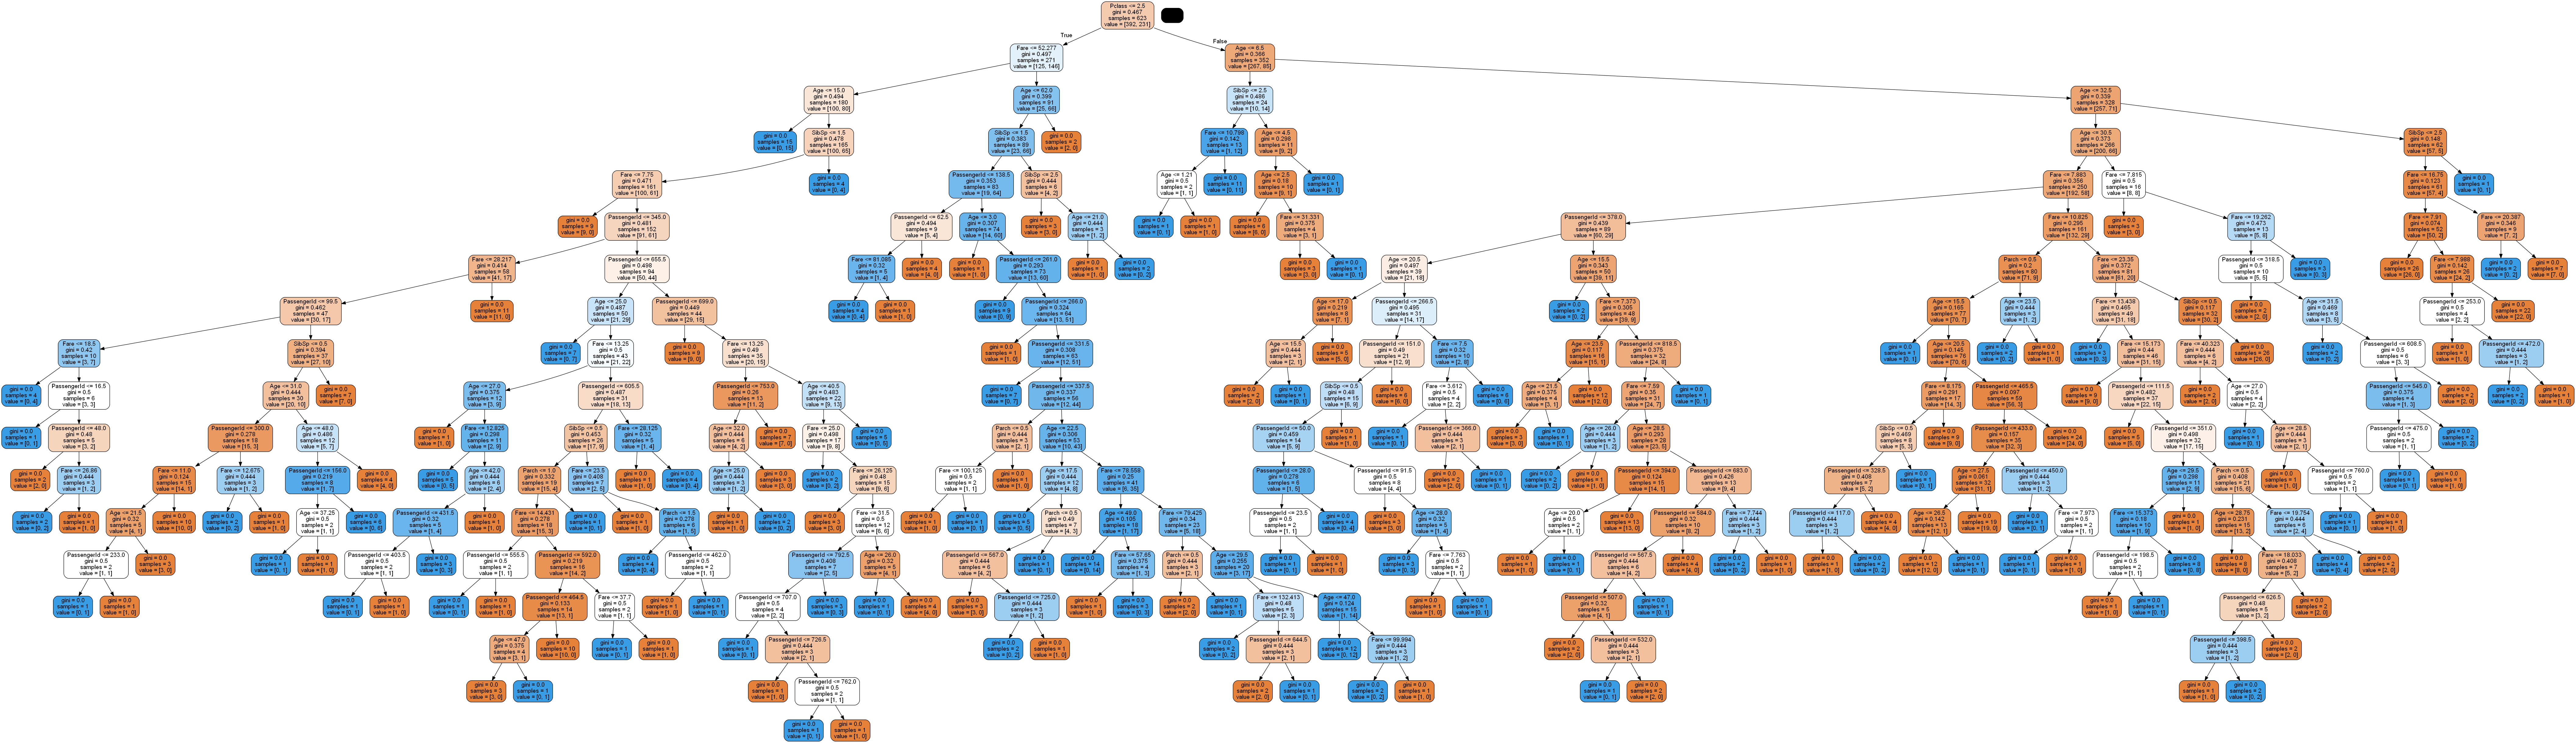

In [20]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(clf,feature_names = feature_name,rounded = True,filled = True)

graph = pydotplus.graph_from_dot_data(dot_data)  
from IPython.display import Image

graph.write_png("myTree.png")

Image(graph.create_png())

In [21]:
clf.score(x_train,y_train)

1.0

In [22]:
py_pred = clf.predict(x_test)

In [23]:
clf.score(x_test,y_test)

0.7052238805970149

In [24]:
scalar = StandardScaler()

x_transform = scalar.fit_transform(X)

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size = 0.30, random_state= 42)

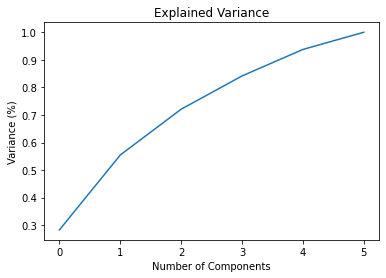

In [26]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [27]:
pca = PCA(n_components=4)
new_data = pca.fit_transform(x_transform)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4'])

In [28]:
principal_x

,PC-1,PC-2,PC-3,PC-4
0,-1.277099,-0.027163,-1.681007,0.197507
1,1.609912,0.334643,-1.899766,0.098334
2,-0.983909,-0.662819,-1.680666,0.197599
3,1.304667,0.256701,-1.868982,0.158061
4,-0.658123,-0.865327,-1.716463,-0.356538
...,...,...,...,...
886,0.186847,-0.744049,1.661520,0.395505
887,0.891391,-0.322178,1.638401,1.229129
888,-0.727483,1.263619,1.952521,-1.031556
889,1.143858,-0.480563,1.612318,0.797464


In [29]:
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.30, random_state= 42)

In [30]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.667910447761194

In [31]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [32]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [33]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [34]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 24, 'min_samples_leaf': 9, 'min_samples_split': 4, 'splitter': 'random'}


In [35]:
grid_search.best_score_

0.7222451612903227

In [36]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =28, min_samples_leaf= 8, min_samples_split= 2, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_leaf=8,
                       splitter='random')

In [37]:
clf.score(x_test,y_test)

0.6716417910447762

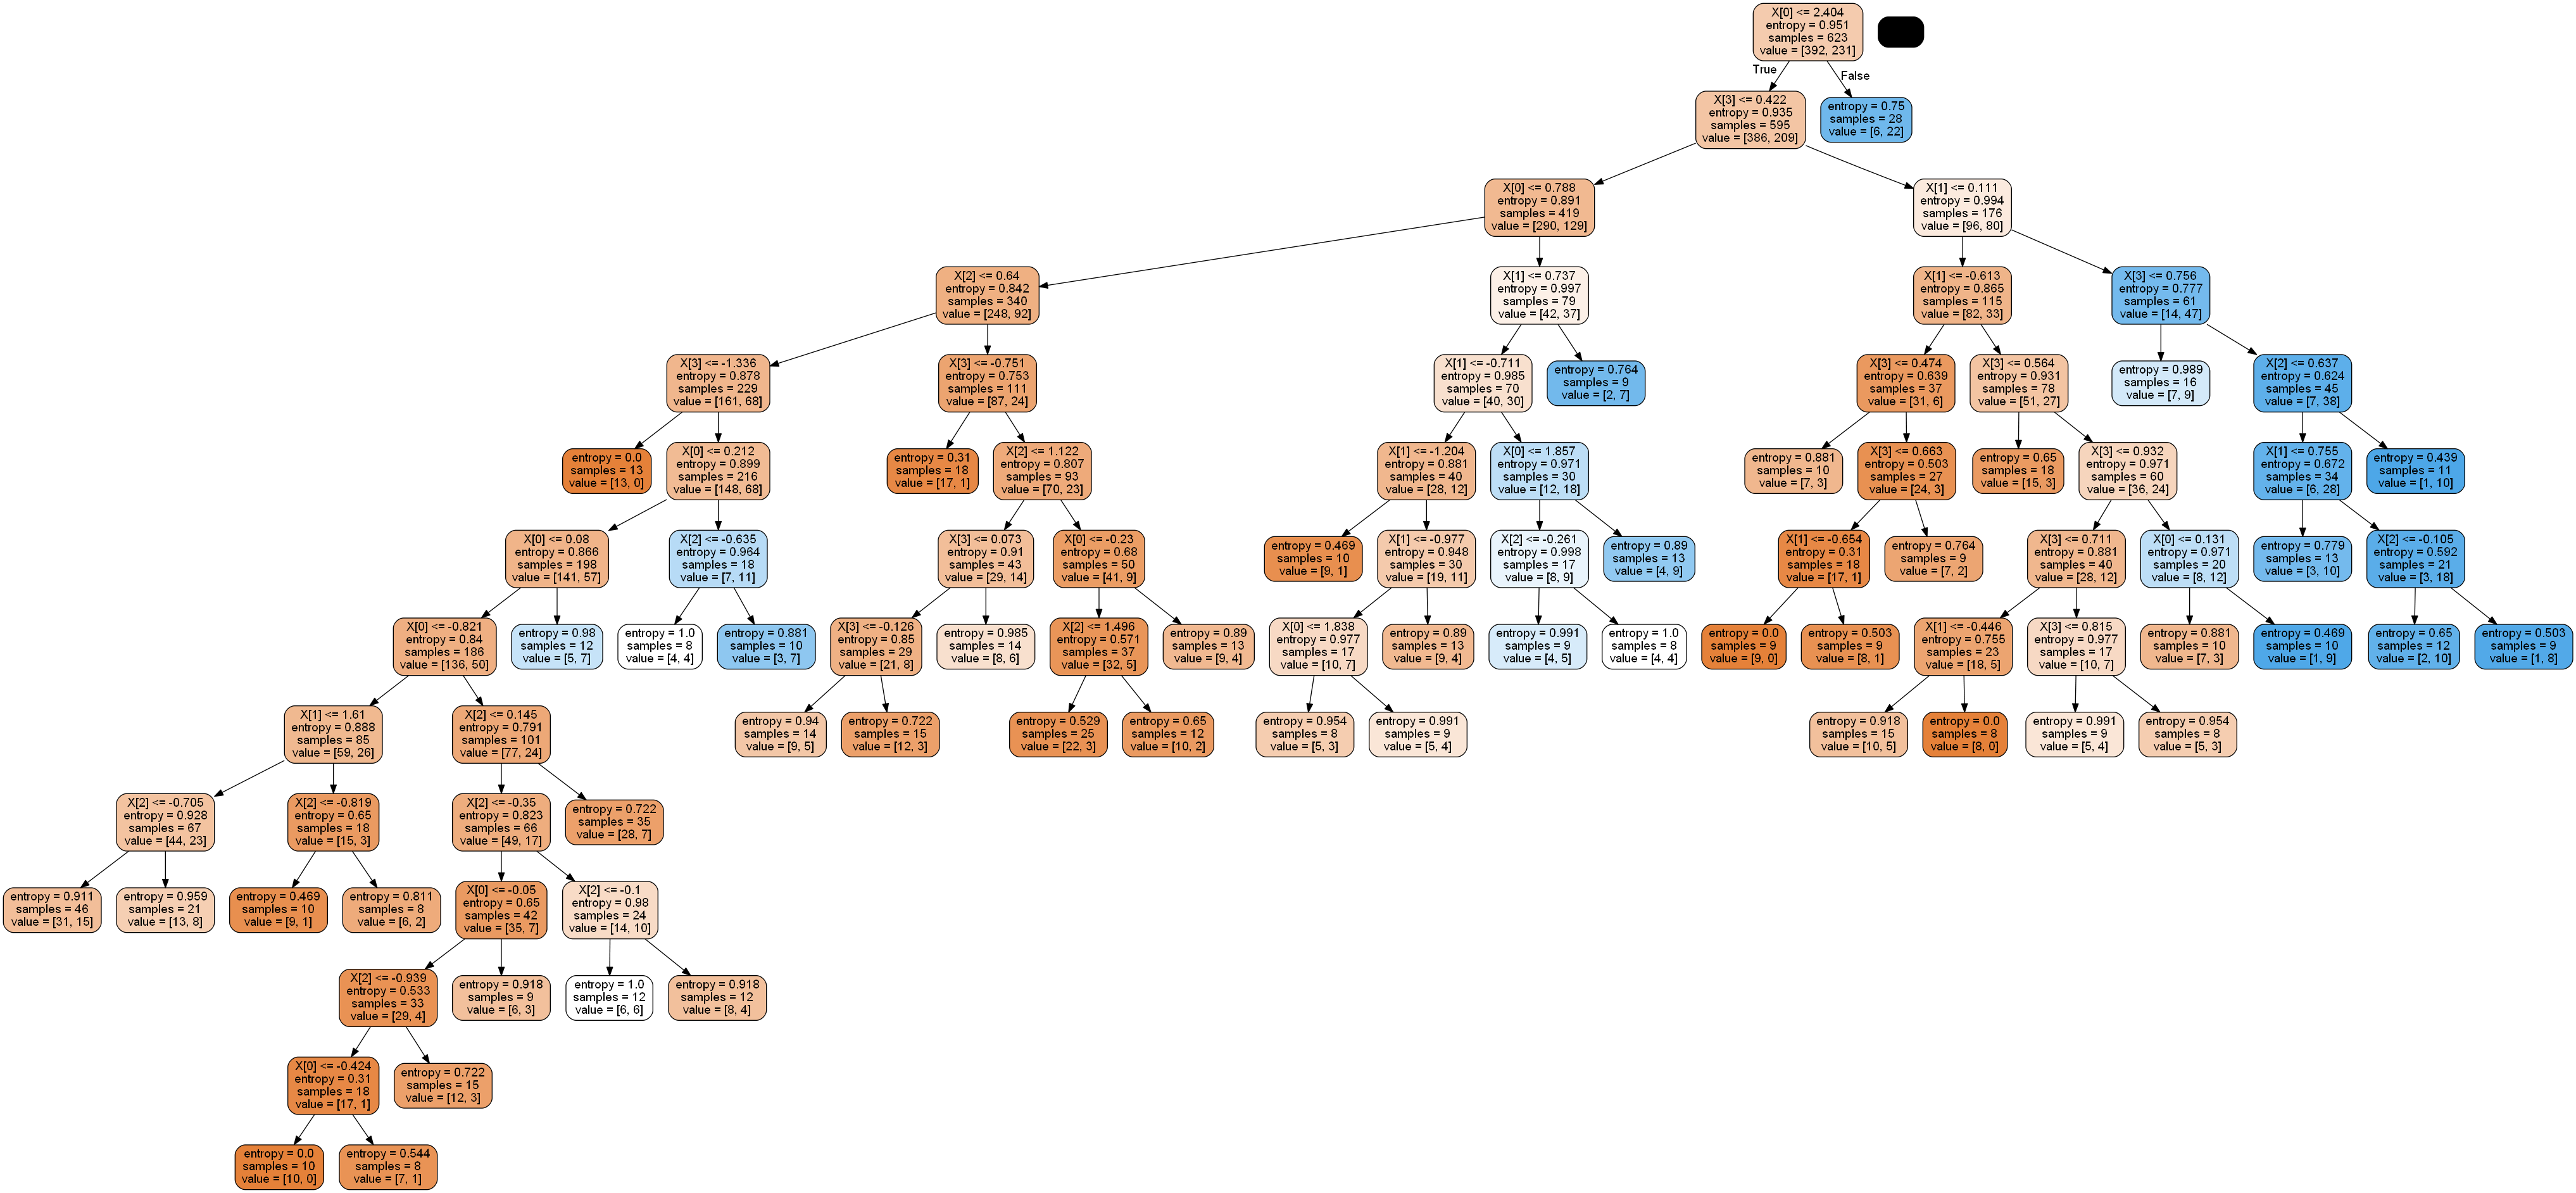

In [38]:
feature_name=list(X.columns)
class_name = list(y_train)


dot_data = export_graphviz(clf,rounded = True,filled = True)

graph = pydotplus.graph_from_dot_data(dot_data)  

#graph.write_png("tree.png")

Image(graph.create_png())